In [ ]:

!apt upgrade

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
Some packages could not be installed. This may mean that you have
requested an impossible situation or if you are using the unstable
distribution that some required packages have not yet been created
or been moved out of Incoming.
The following information may help to resolve the situation:

The following packages have unmet dependencies:
 libnvidia-common-495 : Conflicts: libnvidia-common
E: Broken packages


In [ ]:
!apt update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://www.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

In [ ]:
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.1.2-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession
spark= SparkSession \
       .builder \
       .appName("Our First Spark example") \
       .getOrCreate()

In [ ]:
data_path='/content/drive/MyDrive/million.csv'
df=spark.read.csv(data_path,header=True,inferSchema=True,sep=";")



In [ ]:
df.head()

Row(sensor_id=11737, sensor_type='SDS011', location=5926, lat=49.014, lon=12.043, timestamp=datetime.datetime(2019, 1, 15, 7, 12, 34), P1='3.23', durP1=None, ratioP1=None, P2='2.20', durP2=None, ratioP2=None)

In [ ]:
df.printSchema()

root
 |-- sensor_id: integer (nullable = true)
 |-- sensor_type: string (nullable = true)
 |-- location: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- P1: string (nullable = true)
 |-- durP1: string (nullable = true)
 |-- ratioP1: string (nullable = true)
 |-- P2: string (nullable = true)
 |-- durP2: string (nullable = true)
 |-- ratioP2: string (nullable = true)



In [ ]:
df.show(3)

+---------+-----------+--------+------+------+-------------------+-----+-----+-------+-----+-----+-------+
|sensor_id|sensor_type|location|   lat|   lon|          timestamp|   P1|durP1|ratioP1|   P2|durP2|ratioP2|
+---------+-----------+--------+------+------+-------------------+-----+-----+-------+-----+-----+-------+
|    11737|     SDS011|    5926|49.014|12.043|2019-01-15 07:12:34| 3.23| null|   null| 2.20| null|   null|
|    18762|     SDS011|    9510|49.846|19.718|2019-01-16 15:39:23|47.73| null|   null|27.63| null|   null|
|     6890|     SDS011|    3484|48.714|   9.2|2019-01-21 22:10:21|56.58| null|   null|49.30| null|   null|
+---------+-----------+--------+------+------+-------------------+-----+-----+-------+-----+-----+-------+
only showing top 3 rows



In [ ]:
df.head(5)

[Row(sensor_id=11737, sensor_type='SDS011', location=5926, lat=49.014, lon=12.043, timestamp=datetime.datetime(2019, 1, 15, 7, 12, 34), P1='3.23', durP1=None, ratioP1=None, P2='2.20', durP2=None, ratioP2=None),
 Row(sensor_id=18762, sensor_type='SDS011', location=9510, lat=49.846, lon=19.718, timestamp=datetime.datetime(2019, 1, 16, 15, 39, 23), P1='47.73', durP1=None, ratioP1=None, P2='27.63', durP2=None, ratioP2=None),
 Row(sensor_id=6890, sensor_type='SDS011', location=3484, lat=48.714, lon=9.2, timestamp=datetime.datetime(2019, 1, 21, 22, 10, 21), P1='56.58', durP1=None, ratioP1=None, P2='49.30', durP2=None, ratioP2=None),
 Row(sensor_id=6791, sensor_type='SDS011', location=3433, lat=48.729, lon=9.107, timestamp=datetime.datetime(2019, 1, 30, 11, 37, 1), P1='1.07', durP1=None, ratioP1=None, P2='0.87', durP2=None, ratioP2=None),
 Row(sensor_id=6787, sensor_type='SDS011', location=3431, lat=47.966, lon=10.267, timestamp=datetime.datetime(2019, 1, 25, 6, 52, 46), P1='35.28', durP1=Non

In [ ]:
from pyspark.sql.types import *

In [ ]:
df=df.withColumn("P1",df["P1"].cast(DoubleType()))
df=df.withColumn("P2",df["P2"].cast(DoubleType()))
df=df.drop("durP1","ratioP1","durP2","ratioP2")
df=df.na.drop()

In [ ]:
df.show(2)

+---------+-----------+--------+------+------+-------------------+-----+-----+
|sensor_id|sensor_type|location|   lat|   lon|          timestamp|   P1|   P2|
+---------+-----------+--------+------+------+-------------------+-----+-----+
|    11737|     SDS011|    5926|49.014|12.043|2019-01-15 07:12:34| 3.23|  2.2|
|    18762|     SDS011|    9510|49.846|19.718|2019-01-16 15:39:23|47.73|27.63|
+---------+-----------+--------+------+------+-------------------+-----+-----+
only showing top 2 rows



In [ ]:
from pyspark.sql.functions import udf
from datetime import datetime
def get_day(pickup_dt): 
    return pickup_dt.day
def get_year(pickup_dt): 
    return pickup_dt.year
def get_month(pickup_dt): 
    return pickup_dt.month
def aqi_category(aqi):
  if(aqi<=50):
    return 'Good'
  elif(aqi<=100):
    return "Moderate"
  elif(aqi<=150):
    return "Unhealthy for Sensetive Groups"
  elif(aqi<=200):
    return "Unhealthy"
  elif(aqi<=300):
    return "Very Unhealthy"
  else:
    return "Hazardous"
udf_day = udf(get_day,IntegerType())
udf_year = udf(get_year,IntegerType())
udf_aqi_category = udf(aqi_category,StringType())
udf_month = udf(get_month,IntegerType())
spark.udf.register("udf_day",udf_day)
spark.udf.register("udf_month",udf_month)
spark.udf.register("udf_year",udf_year)
spark.udf.register("udf_aqi_category",udf_aqi_category)

<function __main__.aqi_category>

In [ ]:
from pyspark.sql import functions as f

In [ ]:
df =df.withColumn("timestamp",f.to_date(df.timestamp))
df = df.withColumn("year",udf_year(df.timestamp))
df = df.withColumn("month",udf_month(df.timestamp))
df = df.withColumn("day",udf_day(df.timestamp))
df = df.withColumnRenamed("timestamp","date")
df.printSchema()
df.show(3)

root
 |-- sensor_id: integer (nullable = true)
 |-- sensor_type: string (nullable = true)
 |-- location: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- date: date (nullable = true)
 |-- P1: double (nullable = true)
 |-- P2: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)

+---------+-----------+--------+------+------+----------+-----+-----+----+-----+---+
|sensor_id|sensor_type|location|   lat|   lon|      date|   P1|   P2|year|month|day|
+---------+-----------+--------+------+------+----------+-----+-----+----+-----+---+
|    11737|     SDS011|    5926|49.014|12.043|2019-01-15| 3.23|  2.2|2019|    1| 15|
|    18762|     SDS011|    9510|49.846|19.718|2019-01-16|47.73|27.63|2019|    1| 16|
|     6890|     SDS011|    3484|48.714|   9.2|2019-01-21|56.58| 49.3|2019|    1| 21|
+---------+-----------+--------+------+------+----------+-----+-----+----+-

In [ ]:
df.createOrReplaceTempView("data_jan_2019")
max_per_day_per_location_2019 = spark.sql("SELECT day, location, max(P1) as max_p1, max(P2) as max_p2 FROM data_jan_2019 GROUP BY day, location")
max_per_day_per_location_2019.show()

+---+--------+------+------+
|day|location|max_p1|max_p2|
+---+--------+------+------+
| 28|     571|   0.4|   0.4|
| 21|    1881| 52.38| 19.25|
| 23|    9170|113.57|  29.8|
|  5|    4779|   4.0|   3.3|
| 28|    3238| 36.03| 18.17|
| 14|    7177|   9.3|   4.3|
|  8|    9062|269.03|119.43|
| 29|    8341|105.07|  51.9|
|  9|    8432|  8.87|  4.63|
|  2|    2834|  20.6|  6.77|
| 29|    2860| 102.7| 33.13|
| 20|    8796| 30.67| 19.93|
|  4|     801| 43.23| 18.93|
| 20|    6281| 46.93| 23.33|
| 15|    2731| 16.48|  8.35|
| 24|    7159|  98.7| 41.07|
| 16|    1382| 14.17|  10.6|
|  4|    2484|  39.3| 24.63|
| 30|    6553| 15.53|  9.13|
| 22|    6676| 25.57| 17.77|
+---+--------+------+------+
only showing top 20 rows



In [ ]:
# Constants for calculating P2.5 and 
# AQI_factor = alpha * C_factor + beta
alpha_map={'pm2.5-good': 4.17 ,
           'pm2.5-moderate': 2.1 ,
           'pm2.5-unhealthySG': 2.46,
           'pm2.5-unhealthy': 0.52,
           'pm2.5-very-unhealthy': 0.99,
           'pm2.5-hazardous': 0.8,
           'pm10-good': 0.93 ,
           'pm10-moderate': 0.49 ,
           'pm10-unhealthySG': 0.49,
           'pm10-unhealthy': 0.49,
           'pm10-very-unhealthy': 1.43,
           'pm10-hazardous': 1.11}

beta_map={'pm2.5-good': 0 ,
          'pm2.5-moderate': 25.55 ,
          'pm2.5-unhealthySG': 13.59,
          'pm2.5-unhealthy': 122.34,
          'pm2.5-very-unhealthy': 51.86,
          'pm2.5-hazardous': 101.52,
          'pm10-good': 0 ,
          'pm10-moderate': 23.78 ,
          'pm10-unhealthySG': 24.28,
          'pm10-unhealthy': 24.79,
          'pm10-very-unhealthy': -308.35,
          'pm10-hazardous': -171.49}

In [ ]:
alpha_map_broadcasted=sc.broadcast(alpha_map)
beta_map_broadcasted=sc.broadcast(beta_map)

In [ ]:
import math

In [ ]:
def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [ ]:
def compute_IP2(cp):
    cp = truncate(cp,1)
    if(cp >= 0 and cp <= 12) : return (alpha_map_broadcasted.value['pm2.5-good'] * cp) + beta_map_broadcasted.value['pm2.5-good']
    elif(cp > 12 and cp <= 35.4) : return (alpha_map_broadcasted.value['pm2.5-moderate'] * cp) + beta_map_broadcasted.value['pm2.5-moderate']
    elif(cp > 35.4 and cp <= 55.4) : return (alpha_map_broadcasted.value['pm2.5-unhealthySG'] * cp) + beta_map_broadcasted.value['pm2.5-unhealthySG'] 
    elif(cp > 55.4 and cp <= 150.4) : return (alpha_map_broadcasted.value['pm2.5-unhealthy'] * cp) + beta_map_broadcasted.value['pm2.5-unhealthy']
    elif(cp > 150.4 and cp <= 250.4) : return (alpha_map_broadcasted.value['pm2.5-very-unhealthy'] * cp) + beta_map_broadcasted.value['pm2.5-very-unhealthy'] 
    elif(cp > 250.4 and cp <= 500.4) : return (alpha_map_broadcasted.value['pm2.5-hazardous'] * cp) + beta_map_broadcasted.value['pm2.5-hazardous'] 
    elif(cp > 500.4) : return (alpha_map_broadcasted.value['pm2.5-hazardous']*cp)+ beta_map_broadcasted.value['pm2.5-hazardous']
    else : return -1
    

In [ ]:
def compute_IP10(cp):
    cp = truncate(cp,0)
    if(cp >= 0 and cp <= 54) : return (alpha_map_broadcasted.value['pm10-good'] * cp) + beta_map_broadcasted.value['pm10-good']
    elif(cp > 54 and cp <= 154) : return (alpha_map_broadcasted.value['pm10-moderate'] * cp) + beta_map_broadcasted.value['pm10-moderate']
    elif(cp > 154 and cp <= 254) : return (alpha_map_broadcasted.value['pm10-unhealthySG'] * cp) + beta_map_broadcasted.value['pm10-unhealthySG'] 
    elif(cp > 255 and cp <= 354) : return (alpha_map_broadcasted.value['pm10-unhealthy'] * cp) + beta_map_broadcasted.value['pm10-unhealthy'] 
    elif(cp > 354 and cp <= 424) : return (alpha_map_broadcasted.value['pm10-very-unhealthy'] * cp) + beta_map_broadcasted.value['pm10-very-unhealthy'] 
    elif(cp > 424 and cp <= 604) : return (alpha_map_broadcasted.value['pm10-hazardous'] * cp) + beta_map_broadcasted.value['pm10-hazardous'] 
    elif(cp > 604) : return (alpha_map_broadcasted.value['pm10-hazardous'] * cp) + beta_map_broadcasted.value['pm10-hazardous'] 
    else : return -1

In [ ]:
udf_compute_IP2 = udf(compute_IP2,DoubleType())
udf_compute_IP10 = udf(compute_IP10,DoubleType())
#PM2.5 truncate to 1 decimal
#truncate(118.10,0)
#compute_IP10(610.43)
#compute_IP2(328.8)
#PM10 truncate to integer
#truncate(6553.5,0)
spark.udf.register("udf_compute_IP10", udf_compute_IP10)
spark.udf.register("udf_compute_IP2", udf_compute_IP2)

<function __main__.compute_IP2>

In [ ]:
#max_per_day_per_location_2019 = max_per_day_per_location_2019.withColumn("max_i10",udf_compute_IP10(max_per_day_per_location_2019.max_p1)) \
#.withColumn("max_i2",udf_compute_IP2(max_per_day_per_location_2019.max_p2))
#max_per_day_per_location_2019.show() 

In [ ]:
from pyspark.sql import functions as f

In [ ]:
df_grouped_by_date = df.groupBy("date","lat","lon","sensor_id","year","month","day")\
                       .agg(f.mean(df.P1).alias("avg_p1"),
                            f.mean(df.P2).alias("avg_p2"),
                            f.max(df.P1).alias("max_p1"),
                            f.min(df.P1).alias("min_p1"))\
                       .sort(df.date)

In [ ]:
df_computed_p10 = df_grouped_by_date.withColumn("AQI_P10",udf_compute_IP10(df_grouped_by_date.avg_p1))
df_computed_p2 = df_grouped_by_date.withColumn("AQI_P2",udf_compute_IP2(df_grouped_by_date.avg_p2))
df_computed_p2_labeled = df_computed_p2.withColumn("category",udf_aqi_category(df_computed_p2.AQI_P2))

In [ ]:
df_computed_p10.show(3)

+----------+------+------+---------+----+-----+---+------------------+------------------+------+------+------------------+
|      date|   lat|   lon|sensor_id|year|month|day|            avg_p1|            avg_p2|max_p1|min_p1|           AQI_P10|
+----------+------+------+---------+----+-----+---+------------------+------------------+------+------+------------------+
|2019-01-01|48.765| 9.172|      430|2019|    1|  1|3.7800000000000002|             2.685|  4.13|  3.43|              2.79|
|2019-01-01|48.716| 9.269|     7285|2019|    1|  1|             26.29|           19.4875| 69.83|   3.2|             24.18|
|2019-01-01|52.537|13.266|    17686|2019|    1|  1|              29.6|10.549999999999999| 30.82| 28.38|26.970000000000002|
+----------+------+------+---------+----+-----+---+------------------+------------------+------+------+------------------+
only showing top 3 rows



In [ ]:
df_computed_p2.show(4)

+----------+------+------+---------+----+-----+---+------------------+------------------+------+------+------+
|      date|   lat|   lon|sensor_id|year|month|day|            avg_p1|            avg_p2|max_p1|min_p1|AQI_P2|
+----------+------+------+---------+----+-----+---+------------------+------------------+------+------+------+
|2019-01-01|48.765| 9.172|      430|2019|    1|  1|3.7800000000000002|             2.685|  4.13|  3.43|10.842|
|2019-01-01|48.716| 9.269|     7285|2019|    1|  1|             26.29|           19.4875| 69.83|   3.2| 66.29|
|2019-01-01|52.537|13.266|    17686|2019|    1|  1|              29.6|10.549999999999999| 30.82| 28.38|43.785|
|2019-01-01|51.389| 6.815|     8588|2019|    1|  1| 54.92727272727273|30.548181818181817| 99.53|  11.9|  89.6|
+----------+------+------+---------+----+-----+---+------------------+------------------+------+------+------+
only showing top 4 rows



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def describe_pd(df_in, columns, deciles=False):
    '''
    Function to union the basic stats results and deciles
    :param df_in: the input dataframe
    :param columns: the cloumn name list of the numerical variable
    :param deciles: the deciles output

    :return : the numerical describe info. of the input dataframe

    :author: Ming Chen and Wenqiang Feng
    :email:  von198@gmail.com
    '''

    if deciles:
        percentiles = np.array(range(0, 110, 10))
    else:
        percentiles = [25, 50, 75]

    percs = np.transpose([np.percentile(df_in.select(x).collect(), percentiles) for x in columns])
    percs = pd.DataFrame(percs, columns=columns)
    percs['summary'] = [str(p) + '%' for p in percentiles]
    spark_describe = df_in.describe().toPandas()
    new_df = pd.concat([spark_describe, percs],ignore_index=True)
    new_df = new_df.round(2)
    return new_df[['summary'] + columns]

In [ ]:
cols = ['P2','P1']

In [ ]:
df.describe()

DataFrame[summary: string, sensor_id: string, sensor_type: string, location: string, lat: string, lon: string, P1: string, P2: string, year: string, month: string, day: string]

In [ ]:
df2=df_computed_p10.toPandas()

In [ ]:
df2.describe()

,lat,lon,sensor_id,year,month,day,avg_p1,avg_p2,max_p1,min_p1,AQI_P10
count,193606.000000,193606.000000,193606.000000,193606.0,193606.0,193606.000000,193606.000000,193606.000000,193606.000000,193606.000000,193597.000000
mean,49.070826,11.048684,10484.660656,2019.0,1.0,16.173750,32.138204,16.465747,49.141285,20.700075,27.570321
std,7.408176,14.632273,5624.907210,0.0,0.0,8.926742,117.570033,81.581253,138.139621,111.573484,118.962033
min,-36.853000,-122.908000,92.000000,2019.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.308000,7.329000,5797.000000,2019.0,1.0,9.000000,7.125000,3.520000,11.170000,3.130000,6.510000
50%,50.092000,9.273000,10569.000000,2019.0,1.0,16.000000,14.860000,7.855000,22.970000,7.700000,13.020000
75%,51.567000,12.770000,15412.000000,2019.0,1.0,24.000000,33.205438,18.018750,49.800000,18.800000,30.690000
max,66.347000,174.870000,20093.000000,2019.0,1.0,31.000000,6553.500000,6553.500000,6553.500000,6553.500000,7102.340000


In [ ]:
df2.head(5)

,date,lat,lon,sensor_id,year,month,day,avg_p1,avg_p2,max_p1,min_p1,AQI_P10
0,2019-01-01,48.765,9.172,430,2019,1,1,3.780000,2.685000,4.13,3.43,2.79
1,2019-01-01,48.716,9.269,7285,2019,1,1,26.290000,19.487500,69.83,3.20,24.18
2,2019-01-01,52.537,13.266,17686,2019,1,1,29.600000,10.550000,30.82,28.38,26.97
3,2019-01-01,51.389,6.815,8588,2019,1,1,54.927273,30.548182,99.53,11.90,50.22
4,2019-01-01,52.299,13.689,6448,2019,1,1,15.728000,4.942000,24.37,6.87,13.95


In [ ]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn                   # Graphics
#import geopandas                 # Spatial data manipulation
import pandas                    # Tabular data manipulation
#from pysal.explore import esda   # Exploratory Spatial analytics
#from pysal.lib import weights
    

In [ ]:
#!pip install geopandas

In [ ]:
import geopandas

In [ ]:
#!pip install pysal

In [ ]:
from pysal.explore import esda
from pysal.lib import weights

In [ ]:
df2.head(2)

,date,lat,lon,sensor_id,year,month,day,avg_p1,avg_p2,max_p1,min_p1,AQI_P10
0,2019-01-01,48.765,9.172,430,2019,1,1,3.78,2.6850,4.13,3.43,2.79
1,2019-01-01,48.716,9.269,7285,2019,1,1,26.29,19.4875,69.83,3.20,24.18


In [ ]:
from shapely.geometry import  Point
df2['coordonnées']=df2[['lon','lat']].values.tolist()
df2['coordonnées']=df2['coordonnées'].apply(Point)

In [ ]:
df2.head(10)

,date,lat,lon,sensor_id,year,month,day,avg_p1,avg_p2,max_p1,min_p1,AQI_P10,coordonnées
0,2019-01-01,48.765,9.172,430,2019,1,1,3.780000,2.685000,4.13,3.43,2.79,POINT (9.172000000000001 48.765)
1,2019-01-01,48.716,9.269,7285,2019,1,1,26.290000,19.487500,69.83,3.20,24.18,POINT (9.269 48.716)
2,2019-01-01,52.537,13.266,17686,2019,1,1,29.600000,10.550000,30.82,28.38,26.97,POINT (13.266 52.537)
3,2019-01-01,51.389,6.815,8588,2019,1,1,54.927273,30.548182,99.53,11.90,50.22,POINT (6.815 51.389)
4,2019-01-01,52.299,13.689,6448,2019,1,1,15.728000,4.942000,24.37,6.87,13.95,POINT (13.689 52.299)
5,2019-01-01,47.677,-122.173,16304,2019,1,1,7.883333,6.008889,12.27,4.30,6.51,POINT (-122.173 47.677)
6,2019-01-01,45.552,-122.600,1360,2019,1,1,31.546667,20.476667,44.00,19.60,28.83,POINT (-122.6 45.552)
7,2019-01-01,51.469,6.770,3293,2019,1,1,40.523750,16.887500,98.43,11.63,37.20,POINT (6.77 51.469)
8,2019-01-01,52.004,8.512,15230,2019,1,1,27.914000,17.996000,44.50,13.97,25.11,POINT (8.512 52.004)
9,2019-01-01,52.092,11.557,5418,2019,1,1,13.035000,4.835000,16.00,10.07,12.09,POINT (11.557 52.092)


In [ ]:
df3=geopandas.GeoDataFrame(df2,geometry='coordonnées')

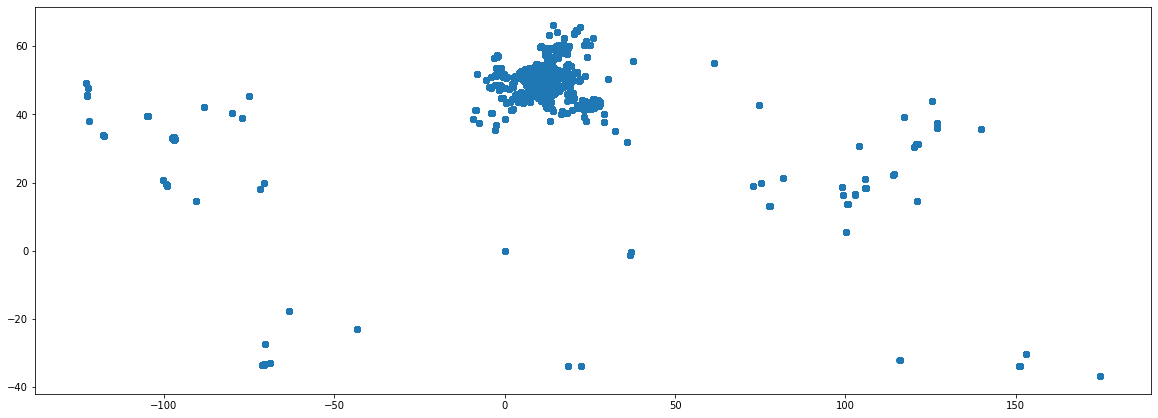

In [ ]:
df3.plot(figsize=(20,10))

In [ ]:
country=geopandas.read_file("/content/drive/MyDrive/germany_states_simplify200.geojson")
df3.set_crs(epsg=4326,inplace=True)
country.set_crs(epsg=4326,inplace=True)
df_in_germany =df3.sjoin(country,predicate='within')

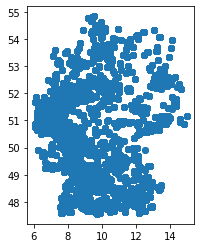

In [ ]:
df_in_germany.plot()

In [ ]:
df_in_germany.head(5)

,date,lat,lon,sensor_id,year,month,day,avg_p1,avg_p2,max_p1,min_p1,AQI_P10,coordonnées,index_right,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,NBD,SN_L,SN_R,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,DEBKG_ID
0,2019-01-01,48.765,9.172,430,2019,1,1,3.780000,2.685000,4.13,3.43,2.79,POINT (9.17200 48.76500),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
1,2019-01-01,48.716,9.269,7285,2019,1,1,26.290000,19.487500,69.83,3.20,24.18,POINT (9.26900 48.71600),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
12,2019-01-01,48.470,9.227,3589,2019,1,1,41.872857,21.185714,127.57,3.50,38.13,POINT (9.22700 48.47000),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
21,2019-01-01,48.755,9.257,11272,2019,1,1,6.557143,4.582857,10.07,1.80,5.58,POINT (9.25700 48.75500),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
25,2019-01-01,48.777,9.133,2870,2019,1,1,15.160000,9.154000,52.83,1.90,13.95,POINT (9.13300 48.77700),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603


In [ ]:
from datetime import  date
selected_date=date.fromisoformat('2019-01-01')
df_in_germany1=df_in_germany[df_in_germany["date"]==selected_date]
df_in_germany1.head(10)

,date,lat,lon,sensor_id,year,month,day,avg_p1,avg_p2,max_p1,min_p1,AQI_P10,coordonnées,index_right,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,NBD,SN_L,SN_R,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,DEBKG_ID
0,2019-01-01,48.765,9.172,430,2019,1,1,3.780000,2.685000,4.13,3.43,2.79,POINT (9.17200 48.76500),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
1,2019-01-01,48.716,9.269,7285,2019,1,1,26.290000,19.487500,69.83,3.20,24.18,POINT (9.26900 48.71600),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
12,2019-01-01,48.470,9.227,3589,2019,1,1,41.872857,21.185714,127.57,3.50,38.13,POINT (9.22700 48.47000),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
21,2019-01-01,48.755,9.257,11272,2019,1,1,6.557143,4.582857,10.07,1.80,5.58,POINT (9.25700 48.75500),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
25,2019-01-01,48.777,9.133,2870,2019,1,1,15.160000,9.154000,52.83,1.90,13.95,POINT (9.13300 48.77700),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
27,2019-01-01,49.386,8.674,18711,2019,1,1,5.535000,4.630000,6.07,5.00,4.65,POINT (8.67400 49.38600),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
29,2019-01-01,47.992,7.848,2438,2019,1,1,10.030000,6.270000,10.03,10.03,9.30,POINT (7.84800 47.99200),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
45,2019-01-01,49.201,9.242,7255,2019,1,1,28.217500,24.082500,57.97,10.23,26.04,POINT (9.24200 49.20100),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
47,2019-01-01,48.738,9.227,1378,2019,1,1,69.271429,49.275714,430.67,2.67,57.59,POINT (9.22700 48.73800),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603
49,2019-01-01,48.735,9.648,6815,2019,1,1,53.148000,25.474000,210.40,2.23,49.29,POINT (9.64800 48.73500),7,2,4,1,08,08,081110000000,Baden-Württemberg,Land,20,--,ja,08,0,00,00,00,000,0,DE1,080000000000,08000000,1997-01-01,DEBKGDL20000E603


In [ ]:
df_in_germany1.columns

Index(['date', 'lat', 'lon', 'sensor_id', 'year', 'month', 'day', 'avg_p1',
       'avg_p2', 'max_p1', 'min_p1', 'AQI_P10', 'coordonnées', 'index_right',
       'ADE', 'GF', 'BSG', 'RS', 'AGS', 'SDV_RS', 'GEN', 'BEZ', 'IBZ', 'BEM',
       'NBD', 'SN_L', 'SN_R', 'SN_K', 'SN_V1', 'SN_V2', 'SN_G', 'FK_S3',
       'NUTS', 'RS_0', 'AGS_0', 'WSK', 'DEBKG_ID'],
      dtype='object')

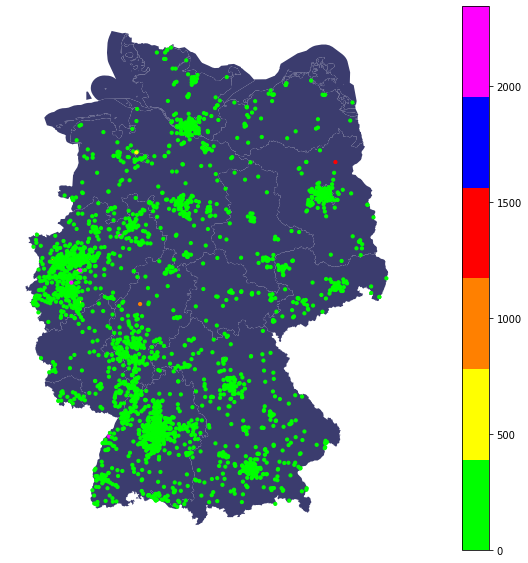

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
fig, ax = plt.subplots(1, figsize=(20,10))
base = country.plot(ax=ax, color='#3B3C6E')
colors = [(0, 1, 0), (1, 1, 0), (1, 0.5, 0),(1,0,0),(0,0,1),(1,0,1)]
cmap1 = LinearSegmentedColormap.from_list("cat", colors, N=6)
df_in_germany1.plot(ax=base, column="AQI_P10" ,cmap=cmap1, markersize=10 , label="AQI_P10",legend=True);
_ = ax.axis('off')



In [ ]:

df4=df_computed_p2.toPandas()

In [ ]:
df4['coordonnées']=df4[['lon','lat']].values.tolist()
df4['coordonnées']=df4['coordonnées'].apply(Point)

In [ ]:
df5=geopandas.GeoDataFrame(df4,geometry='coordonnées')

In [ ]:
df5.head(3)

,date,lat,lon,sensor_id,year,month,day,avg_p1,avg_p2,max_p1,min_p1,AQI_P2,coordonnées
0,2019-01-01,48.765,9.172,430,2019,1,1,3.78,2.6850,4.13,3.43,10.842,POINT (9.17200 48.76500)
1,2019-01-01,48.716,9.269,7285,2019,1,1,26.29,19.4875,69.83,3.20,66.290,POINT (9.26900 48.71600)
2,2019-01-01,52.537,13.266,17686,2019,1,1,29.60,10.5500,30.82,28.38,43.785,POINT (13.26600 52.53700)


In [ ]:
#from matplotlib.colors import LinearSegmentedColormap
#fig, ax = plt.subplots(1, figsize=(20,10))
#base = country.plot(ax=ax, color='#3B3C6E')
#colors = [(0, 1, 0), (1, 1, 0), (1, 0.5, 0),(1,0,0),(0,0,1),(1,0,1)]
#cmap1 = LinearSegmentedColormap.from_list("cat", colors, N=6)
#df5.plot(ax=base, column="AQI_P2" ,cmap=cmap1, markersize=10 , label="AQI_P2",legend=True);
#_ = ax.axis('off')

In [ ]:

median_aqi = df_in_germany1.groupby(df_in_germany1.BEZ,)
median_aqi = median_aqi.mean()["AQI_P10"]
median_aqi.head()

BEZ
Freie Hansestadt        79.990000
Freie und Hansestadt    33.271635
Freistaat               25.678276
Land                    37.135120
Name: AQI_P10, dtype: float64

In [ ]:
germany_data = country.join(median_aqi,on="BEZ")
germany_data = germany_data[["ADE","BEZ","geometry","AQI_P10"]]

In [ ]:
germany_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ADE       35 non-null     int64   
 1   BEZ       35 non-null     object  
 2   geometry  35 non-null     geometry
 3   AQI_P10   35 non-null     float64 
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 1.2+ KB


Text(0.5, 1.0, 'AQI')

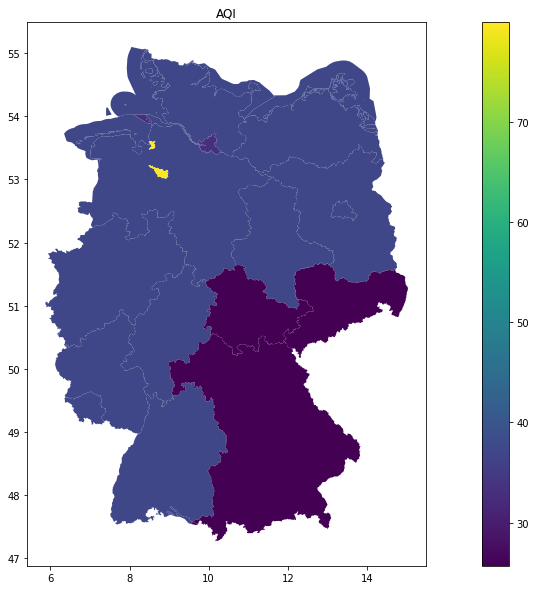

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
germany_data.plot(ax=ax,column="AQI_P10",legend=True,Label=" AQI",figsize=(20,10))
ax.set_title("AQI")

In [ ]:
w=weights.distance.KNN.from_dataframe(germany_data,k=10)

In [ ]:
w.data

array([[ 9.8170775 , 54.18405518],
       [10.01688184, 53.54712613],
       [ 9.15992835, 52.76562932],
       [ 8.74340232, 53.19966213],
       [ 7.5621362 , 51.47985732],
       [ 9.03117814, 50.60325643],
       [ 7.44915333, 49.91375413],
       [ 9.04642155, 48.54541386],
       [11.41989995, 48.94751529],
       [ 6.95331505, 49.38437152],
       [13.40218457, 52.50138472],
       [13.39785647, 52.47284601],
       [12.53482975, 53.75327191],
       [13.34858058, 51.05231305],
       [11.70071225, 52.01323163],
       [11.02500902, 50.90384216],
       [ 8.74335613, 54.50775024],
       [ 8.10066811, 53.73677896],
       [13.0565031 , 54.48445187],
       [ 9.3854108 , 53.76433177],
       [ 9.77331933, 54.64830999],
       [ 9.81349426, 53.54831422],
       [ 8.90913707, 53.60456452],
       [ 7.28929332, 53.5954563 ],
       [ 8.53240785, 53.56368724],
       [ 9.05834279, 47.70783216],
       [13.64131462, 53.9267603 ],
       [ 9.05291105, 54.42993227],
       [ 8.37208274,

In [ ]:
!pip install contextily

In [ ]:
import contextily  

In [ ]:
def g_map(g, geog, ax):
    '''
    Create a cluster map
    ...
    
    Arguments
    ---------
    g      : G_Local
             Object from the computation of the G statistic
    geog   : GeoDataFrame
             Table aligned with values in `g` and containing 
             the geometries to plot
    ax     : AxesSubplot
             `matplotlib` axis to draw the map on

    Returns
    -------
    ax     : AxesSubplot
             Axis with the map drawn
    '''
    ec = '0.8'
    
    # Break observations into significant or not
    sig = g.p_sim < 0.05

    # Plot non-significant clusters
    ns = germany_data.loc[sig==False, 'geometry']
    ns.plot(ax=ax, color='lightgrey', edgecolor=ec, linewidth=0.1)
    # Plot HH clusters
    hh = germany_data.loc[(g.Zs > 0) & (sig==True), 'geometry']
    hh.plot(ax=ax, color='red', edgecolor=ec, linewidth=0.1)
    # Plot LL clusters
    ll = germany_data.loc[(g.Zs < 0) & (sig==True), 'geometry']
    ll.plot(ax=ax, color='blue', edgecolor=ec, linewidth=0.1)
    # Style and draw
    contextily.add_basemap(ax, 
                           crs=germany_data.crs, 
                           source=contextily.providers.Stamen.TerrainBackground,

                          )
    st = ''
    if g.star:
        st = '*'
    ax.set_title(f'G{st} statistic for Pct of Leave votes', size=15)
    ax.set_axis_off()
    return ax

In [ ]:
gostars=esda.getisord.G_Local(germany_data['AQI_P10'],w,star=True)

In [ ]:
gostars.p_sim

array([0.036, 0.022, 0.034, 0.064, 0.005, 0.401, 0.205, 0.051, 0.016,
       0.214, 0.065, 0.065, 0.229, 0.079, 0.07 , 0.031, 0.02 , 0.02 ,
       0.421, 0.024, 0.036, 0.022, 0.018, 0.018, 0.058, 0.047, 0.224,
       0.015, 0.008, 0.016, 0.016, 0.047, 0.394, 0.047, 0.119])

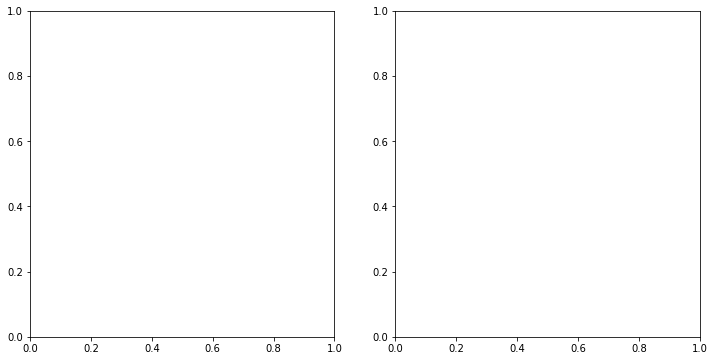

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))

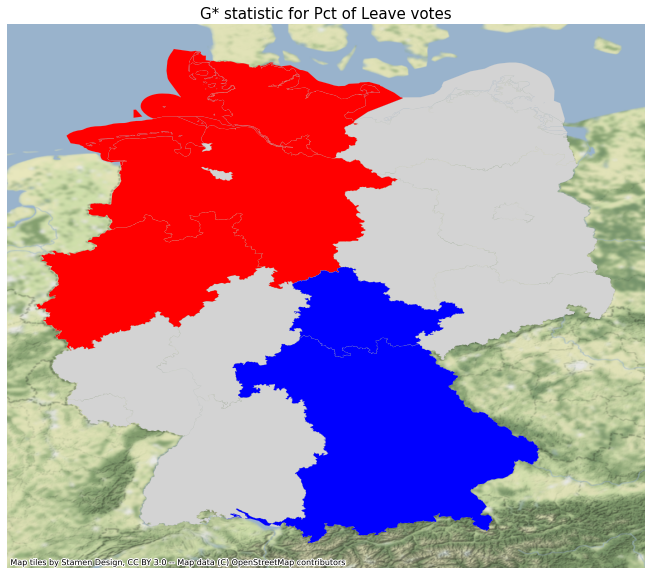

In [ ]:
f,ax=plt.subplots(1,figsize=(20,10))
g_map(gostars,germany_data,ax)